<a href="https://colab.research.google.com/github/Gauthamsprasad/TensorFlow/blob/main/3_CNN_Binary_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intro to CNN & Computer Vision

Computer vision is the practice of writting algo which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car infornt


### Get Data

The images are from Food 101 dataset from kaggle it has (101 different classes of food)

How ever we've modified it on only use two classes (pizza & Steak)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip thendownloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-12-06 14:05:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 64.233.179.207, 209.85.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   163MB/s    in 0.6s    

2025-12-06 14:05:34 (163 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data (before one with it)

A very crucial step at the begining of any ml project is bcoming one with data.

And  for a computer vision this usually means visulizing many sampels of data.




In [ ]:
!ls pizza_steak  #List the files in pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through the dataset and list no of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

### Visualize the images

1. Get the classs name programmatically

In [ ]:
# Get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets visulize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir +"/"+ target_class  # Selecting the folder of images

  random_image = random.sample(os.listdir(target_folder), 1)  # Selecting one image from the folder
  print(random_image)

  img = mpimg.imread(target_folder+"/"+random_image[0]) # random_image[0] reads the name of the file from the list
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}")
  return img

['874288.jpg']
Image Shape: (512, 512, 3)


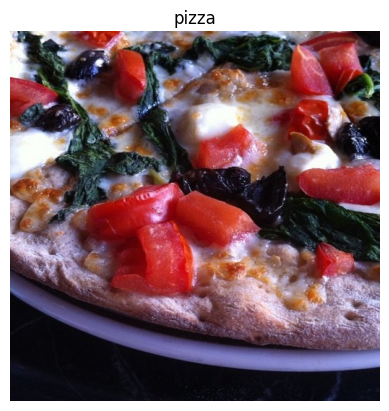

In [ ]:
img = view_random_image("pizza_steak/train", "pizza")

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf

tf.constant(img)  # pixel values

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[208, 185, 171],
        [235, 213, 202],
        [250, 229, 224],
        ...,
        [ 17,  11,  15],
        [ 15,   9,  13],
        [ 13,   7,  11]],

       [[229, 207, 194],
        [248, 228, 217],
        [255, 240, 236],
        ...,
        [ 15,   9,  13],
        [ 15,   9,  13],
        [ 15,   9,  13]],

       [[248, 230, 218],
        [254, 237, 229],
        [255, 241, 241],
        ...,
        [ 12,   7,  11],
        [ 13,   8,  12],
        [ 15,  10,  14]],

       ...,

       [[ 10,  11,  16],
        [ 10,  11,  16],
        [  9,  10,  15],
        ...,
        [  7,  11,  22],
        [  7,  11,  22],
        [  8,  12,  23]],

       [[  9,  10,  14],
        [  9,  10,  14],
        [ 10,  11,  16],
        ...,
        [  9,  13,  22],
        [  8,  12,  21],
        [  7,  11,  20]],

       [[  8,   9,  13],
        [  9,  10,  14],
        [ 10,  11,  16],
        ...,
        [ 10,  14,  2

In [ ]:
# Get all the pixel values between 0 & 1

img/255

array([[[0.81568627, 0.7254902 , 0.67058824],
        [0.92156863, 0.83529412, 0.79215686],
        [0.98039216, 0.89803922, 0.87843137],
        ...,
        [0.06666667, 0.04313725, 0.05882353],
        [0.05882353, 0.03529412, 0.05098039],
        [0.05098039, 0.02745098, 0.04313725]],

       [[0.89803922, 0.81176471, 0.76078431],
        [0.97254902, 0.89411765, 0.85098039],
        [1.        , 0.94117647, 0.9254902 ],
        ...,
        [0.05882353, 0.03529412, 0.05098039],
        [0.05882353, 0.03529412, 0.05098039],
        [0.05882353, 0.03529412, 0.05098039]],

       [[0.97254902, 0.90196078, 0.85490196],
        [0.99607843, 0.92941176, 0.89803922],
        [1.        , 0.94509804, 0.94509804],
        ...,
        [0.04705882, 0.02745098, 0.04313725],
        [0.05098039, 0.03137255, 0.04705882],
        [0.05882353, 0.03921569, 0.05490196]],

       ...,

       [[0.03921569, 0.04313725, 0.0627451 ],
        [0.03921569, 0.04313725, 0.0627451 ],
        [0.03529412, 0

### An end to end example

Lets build a CNN to find patterns in our images

* Load image
* Preprocess our images
* Build CNN to find patterns in our image
* Compile the CNN
* Fit the CNN to our data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values b/w 0 & 1 also called scaling/ normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Importdata from directories and turn it into bactches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model



model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")

])

# Compile CNN

model_1.compile(
    loss = "BinaryCrossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5521 - loss: 0.6866 - val_accuracy: 0.7740 - val_loss: 0.4910
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7882 - loss: 0.4765 - val_accuracy: 0.8500 - val_loss: 0.3636
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8342 - loss: 0.3916 - val_accuracy: 0.8460 - val_loss: 0.3636
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8214 - loss: 0.3723 - val_accuracy: 0.8640 - val_loss: 0.3298
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8376 - loss: 0.3757 - val_accuracy: 0.8820 - val_loss: 0.3077


In [ ]:
model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Useing the model as before

Lets replicate the model we've build in previous section to see if it work with our image data.

The model we're building is from tf playground

In [ ]:
#set random seed

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_2.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.4912 - loss: 0.8338 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.5057 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.4958 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
#set random seed

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_3.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])


history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 324ms/step - accuracy: 0.5662 - loss: 3.4427 - val_accuracy: 0.7740 - val_loss: 0.5576
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.7199 - loss: 0.9019 - val_accuracy: 0.7920 - val_loss: 0.4967
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.6840 - loss: 0.9788 - val_accuracy: 0.7960 - val_loss: 0.4624
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - accuracy: 0.7786 - loss: 0.5546 - val_accuracy: 0.7140 - val_loss: 0.5658
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - accuracy: 0.7714 - loss: 0.5041 - val_accuracy: 0.7780 - val_loss: 0.4837


In [ ]:
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification : Let's break it down  (the cnn model)

1. Become one with data
2. Preprocess the data (Scaling / Normalizing)
3. Created model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust parameters and imporove the model (try to beat baseline)
7. Repeat until satisfied (exp,exp,exp)

#### Become one with data

['2628106.jpg']
Image Shape: (512, 512, 3)
['884986.jpg']
Image Shape: (384, 512, 3)


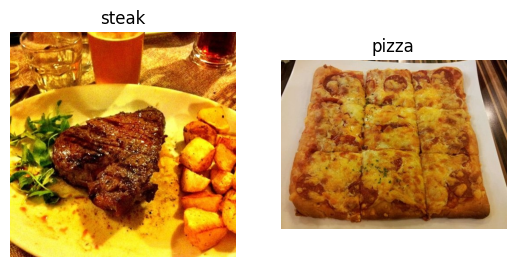

In [ ]:
#Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image("pizza_steak/train","steak")
plt.subplot(1, 2, 2)
steak_image = view_random_image("pizza_steak/train","pizza")

#### Preprocess the data (for model)

In [ ]:
# Define the dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

##### Turn the data into **batches**

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir,       #  Target directory of images
                                               target_size = (224,224),   # Target size of image
                                               class_mode = "binary",       # "categorical", "binary", "sparse"  type of data working with (model usage)
                                               batch_size = 32)             # size of mini batchesto load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:

# Get a sample of training data
images, labels = next(train_data) #get the next batch of img/labels in the train data

In [ ]:
len(images),len(labels)

(32, 32)

### Train

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

model_4 = Sequential([
    Conv2D(filters = 10,         # no of sliding windows going across an input
           kernel_size = 3,     # size of the sliding window
           strides = 1,         # size of the steps the sliding window takes across an input
           padding = "valid",   # if 'same' output is same as input shape (more info good at learn the ptns close to edges) , if 'valid' output shape os compressed
           activation = "relu",
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data, # combination of x and y
                       epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6443 - loss: 0.8582 - val_accuracy: 0.8100 - val_loss: 0.4530
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8153 - loss: 0.4312 - val_accuracy: 0.7820 - val_loss: 0.4555
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8763 - loss: 0.3192 - val_accuracy: 0.8400 - val_loss: 0.3788
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9560 - loss: 0.1782 - val_accuracy: 0.8300 - val_loss: 0.3827
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9893 - loss: 0.0572 - val_accuracy: 0.8360 - val_loss: 0.3993


In [ ]:
model_4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

### Evaluating our model

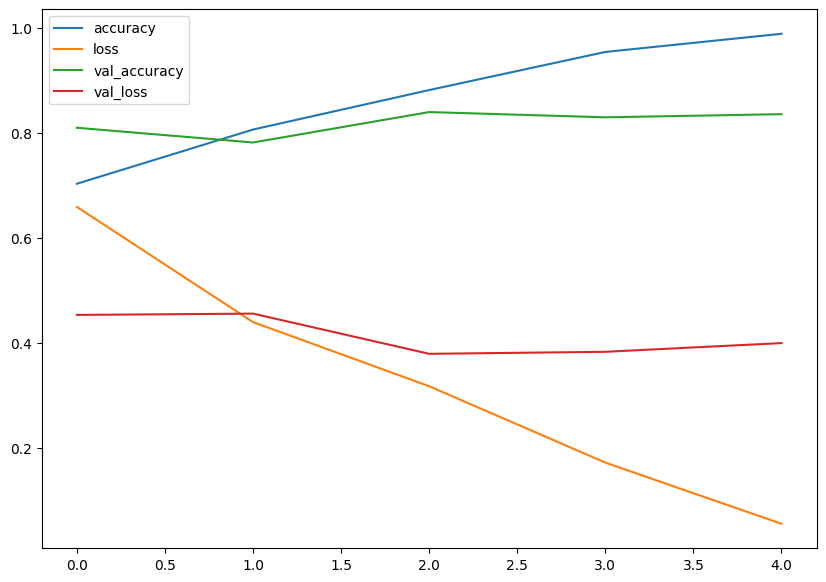

In [ ]:
#Lets plot the training curve

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7));

In [ ]:
# Plot the validation and training curves seperatly
def plot_loss(history):
  train_loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epoch = range(len(history.history["loss"]))

  plt.figure()
  plt.plot(epoch, train_loss, label = "training_loss")
  plt.plot(epoch, val_loss, label = "val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epoch, accuracy, label = "training_accuracy")
  plt.plot(epoch, val_accuracy, label = "val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

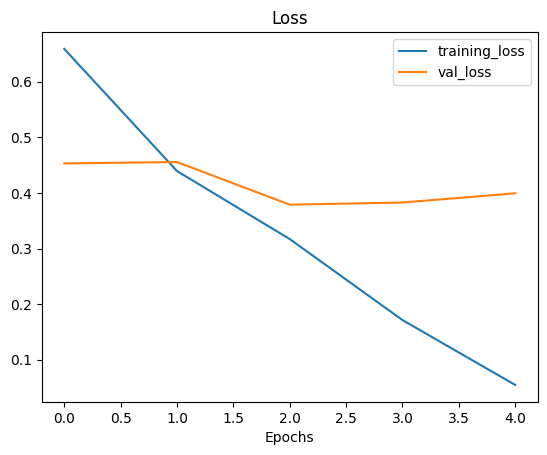

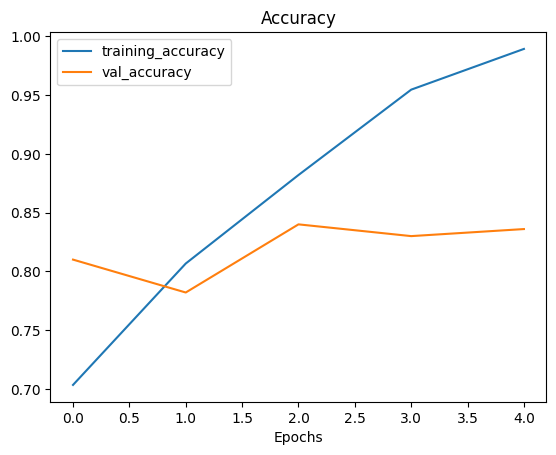

In [ ]:
plot_loss(history_4)

When the **validation loss going up** its likely an **overfitting**

### Adjust the model parameters

Fitting a ml model comes in 3 steps:

1.  Create a baseline
2.  Beat the baseline by overfitting a larger model
3.  Reduce overfitting

Ways to induce overfitting:
* Increse the no. of Conv layer
* Increase the no. of Conv filter
* Add another dense layer to the output of the flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model

model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation= "sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 635ms/step - accuracy: 0.5747 - loss: 0.6615 - val_accuracy: 0.8020 - val_loss: 0.4213
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 693ms/step - accuracy: 0.8071 - loss: 0.4619 - val_accuracy: 0.8640 - val_loss: 0.3331
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 646ms/step - accuracy: 0.8358 - loss: 0.3921 - val_accuracy: 0.8800 - val_loss: 0.3248
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 683ms/step - accuracy: 0.8645 - loss: 0.3525 - val_accuracy: 0.8700 - val_loss: 0.3106
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 674ms/step - accuracy: 0.8539 - loss: 0.3442 - val_accuracy: 0.8840 - val_loss: 0.3032


In [ ]:
model_5.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

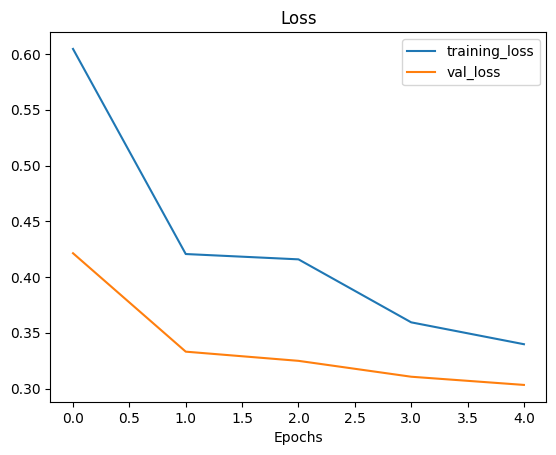

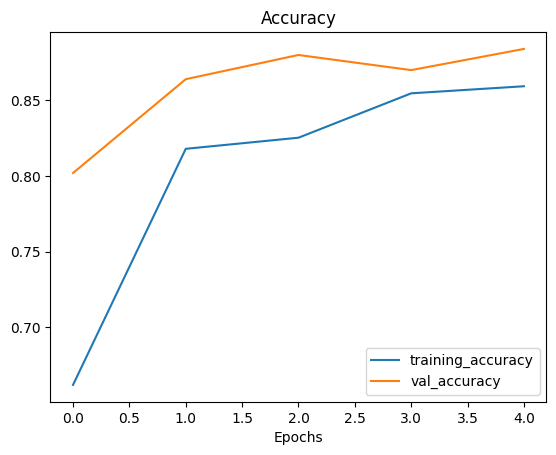

In [ ]:
plot_loss(history_5)

### Data Augmentataion

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range = 0.2,      # How much u want to rotate
                                             shear_range = 0.2 ,        # How much do u want to shear
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,   # Move ur img around x axis
                                             height_shift_range = 0.3,  # Move ur img around y axis
                                             horizontal_flip = True)    # Do u want to flip the image

# Create ImageDataGenerator without data augmentation

train_datagen = ImageDataGenerator(rescale = 1/255.)

test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = False
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = False
)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 32,
                                             )

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Visualize Augmented Data

In [ ]:
images, labels = next(train_data)
aug_img, aug_label = next(train_data_augmented)

Showing image number : 3
Showing image number : 3


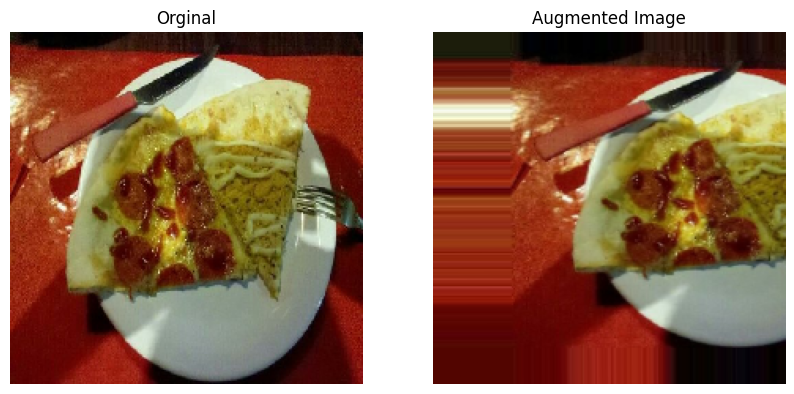

In [ ]:
import random

random_number = random.randint(0,31)
print(f"Showing image number : {random_number}")
plt.figure(figsize= (10 , 7))
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title(f"Orginal")
plt.axis(False)


plt.subplot(1,2,2)
print(f"Showing image number : {random_number}")
plt.imshow(aug_img[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

In [ ]:
model_6 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           input_shape = (224,224,3),
           activation = 'relu'
           ),
    MaxPool2D(pool_size= (2,2)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_6.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_6 = model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6585 - loss: 0.7400 - val_accuracy: 0.5000 - val_loss: 0.7190
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4635 - loss: 0.7407 - val_accuracy: 0.7800 - val_loss: 0.6641
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6005 - loss: 0.6822 - val_accuracy: 0.5220 - val_loss: 0.6622
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6092 - loss: 0.6804 - val_accuracy: 0.6280 - val_loss: 0.6152
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6974 - loss: 0.6073 - val_accuracy: 0.8200 - val_loss: 0.5312


In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           input_shape = (224,224,3),
           activation = 'relu'
           ),
    MaxPool2D(pool_size= (2,2)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_7.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_7 = model_7.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5387 - loss: 0.6832 - val_accuracy: 0.7320 - val_loss: 0.6075
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6883 - loss: 0.6010 - val_accuracy: 0.8040 - val_loss: 0.4272
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7366 - loss: 0.5231 - val_accuracy: 0.8220 - val_loss: 0.3800
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7631 - loss: 0.5084 - val_accuracy: 0.8220 - val_loss: 0.3931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7648 - loss: 0.5119 - val_accuracy: 0.8300 - val_loss: 0.3862


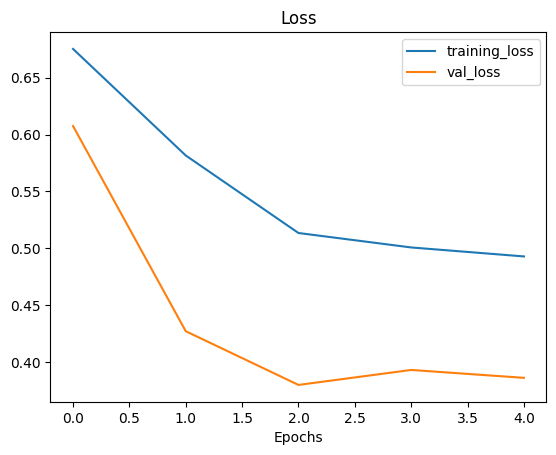

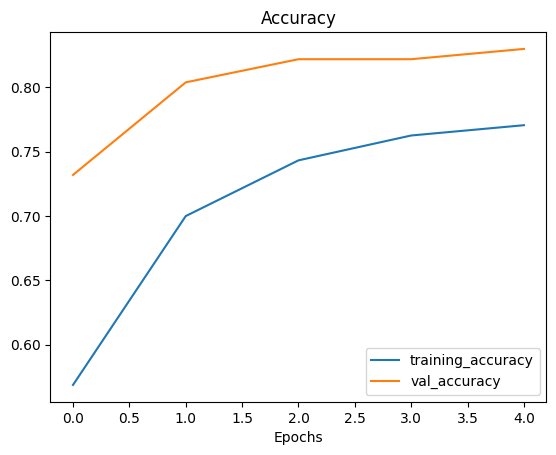

In [ ]:
plot_loss(history_7)

### Repeat until satisfied

To improve the model,

* Increase the no. of layers (eg. add more `Conv2D` / `MaxPool2D` layers)
* Increse th no. of filters in each Conv layer (eg. from 10 - even 64)
* Train for longer ( more epoch)
* Find an ideal learning rate
* Get more data
* Use **Transfer Learning** to leverage what another image model has  learn adjust it for our own use case

### Making prediction on custom data

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
pizza = mpimg.imread("d112a6d7-d173-4ca7-a5ee-40f845719d18_841144.JPG")

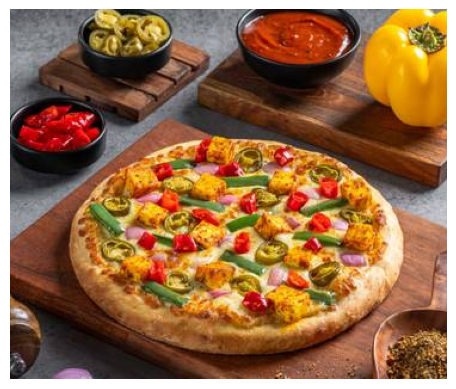

In [ ]:
plt.imshow(pizza)
plt.axis(False);

array([[[113, 114, 119],
        [107, 108, 113],
        [101, 102, 107],
        ...,
        [141, 127, 127],
        [140, 128, 132],
        [143, 132, 136]],

       [[113, 114, 119],
        [111, 112, 117],
        [108, 109, 114],
        ...,
        [161, 149,  89],
        [166, 157,  98],
        [175, 166, 107]],

       [[105, 106, 111],
        [108, 109, 114],
        [111, 112, 117],
        ...,
        [222, 218,  35],
        [228, 224,  41],
        [231, 229,  46]],

       ...,

       [[ 18,  12,  12],
        [ 20,  14,  14],
        [ 22,  16,  18],
        ...,
        [ 78,  39,   0],
        [ 89,  50,  17],
        [ 73,  36,   7]],

       [[ 27,  21,  21],
        [ 26,  20,  20],
        [ 24,  18,  20],
        ...,
        [128,  93,  51],
        [138, 104,  69],
        [113,  78,  48]],

       [[ 29,  23,  23],
        [ 28,  22,  22],
        [ 28,  22,  24],
        ...,
        [148, 115,  72],
        [127,  93,  58],
        [127,  94,  63]]], dtype=uint8)
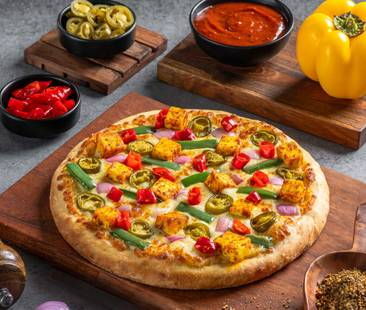

In [ ]:
pizza

In [ ]:
expanded_pizza = tf.expand_dims(pizza, axis=0)
expanded_pizza.shape

TensorShape([1, 310, 366, 3])

In [ ]:
# Create a function to import and resize it to be used with our model
def load_and_prep_image(filename, img_shape = 224):

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Scale the image into 0 - 1 range
  img = img/255.

  return img

In [ ]:
pizza = load_and_prep_image("/content/pizza_steak/test/pizza/1001116.jpg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3515406 , 0.34761903, 0.41820726],
        [0.3462185 , 0.34229693, 0.41288516],
        [0.34735894, 0.34343737, 0.4140256 ],
        ...,
        [0.6792716 , 0.77955186, 0.917647  ],
        [0.66134447, 0.76330525, 0.9084033 ],
        [0.6473389 , 0.75714284, 0.9022409 ]],

       [[0.34565824, 0.34173667, 0.4123249 ],
        [0.34901962, 0.34509805, 0.41568628],
        [0.35238093, 0.34845936, 0.4190476 ],
        ...,
        [0.7294116 , 0.82352924, 0.96314526],
        [0.70674247, 0.8019407 , 0.94313705],
        [0.67667025, 0.77863103, 0.9211278 ]],

       [[0.34985995, 0.34593838, 0.41484594],
        [0.35434175, 0.35042018, 0.41932774],
        [0.35218087, 0.35126048, 0.42184874],
        ...,
        [0.52697045, 0.61016375, 0.72585   ],
        [0.49477777, 0.58425355, 0.7002801 ],
        [0.45828268, 0.55152017, 0.6708678 ]],

       ...,

       [[0.38095245, 0.47899166, 0.7378152 ],
        [0.37

In [ ]:
pred = model_7.predict(tf.expand_dims(pizza, axis = 0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[0.35400093]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

#### We can index the predicted the class by rounding the predicted probability and indexing it on the class_names

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('pizza')

In [ ]:
int(tf.round(pred))

0

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


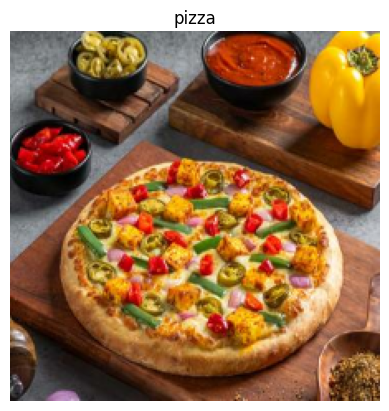

In [ ]:
pred_and_plot(model_7, "/content/d112a6d7-d173-4ca7-a5ee-40f845719d18_841144.JPG.1")